# 3.5 Multiclass Classification

## 3.5.1 Load dataset

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2023-03-04 15:48:54.108649: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# each datapoint is a list of integers (word indices)

In [3]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

### Converting indices to words (for fun)

In [4]:
word_index= reuters.get_word_index()

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [6]:
reverse_word_index[3499]

'autumn'

## 3.5.2 Encode data

In [7]:
# For training inputs, each new vector will contain a 1 at the word-index of the original sequence
import numpy as np

# dimension provides "slots" for 10000 words
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# for training targets, OHE categorical data
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
# built-in way:
"""
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
"""

'\nfrom keras.utils.np_utils import to_categorical\none_hot_train_labels = to_categorical(train_labels)\none_hot_test_labels = to_categorical(test_labels)\n'

## 3.5.3 Building the network 

In [10]:
# Because the dim. of output space is 46, a 16-dim. intermediate space is not suitable 
# (as in the binary class. example)

In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # input shape (any, 10000), output (any, 64)
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax')) # input shape (any, 64), output (any, 46)

In [12]:
# each entry in the resulting 46-dim. vectors encodes a prob. for which of the 46 categories a snippet belongs to.
# in more technical terms, output[i] is the prob. that the snippet belongs to topic i.

In [14]:
model.compile(
    optimizer='rmsprop', # enhanced gradient descent opt.
    loss='categorical_crossentropy', # measures dist. between two prob. distributions (output and target)
    metrics=['accuracy'])

## 3.5.4 Validate the Approach

In [15]:
# set aside the first 1000 values and targets for val. set. Store the rest in partials.
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
# fit model (train 20 epochs) and store result in History object
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 1s 30ms/step - loss: 2.6669 - accuracy: 0.4981 - val_loss: 1.7746 - val_accuracy: 0.6210
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4888 - accuracy: 0.6854 - val_loss: 1.3696 - val_accuracy: 0.6850
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.1489 - accuracy: 0.7488 - val_loss: 1.1874 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9433 - accuracy: 0.7944 - val_loss: 1.0733 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7822 - accuracy: 0.8315 - val_loss: 1.0149 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6510 - accuracy: 0.8601 - val_loss: 0.9490 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5463 - accuracy: 0.8837 - val_loss: 0.9059 - val_accuracy: 0.8130
Epoch 8/20
16

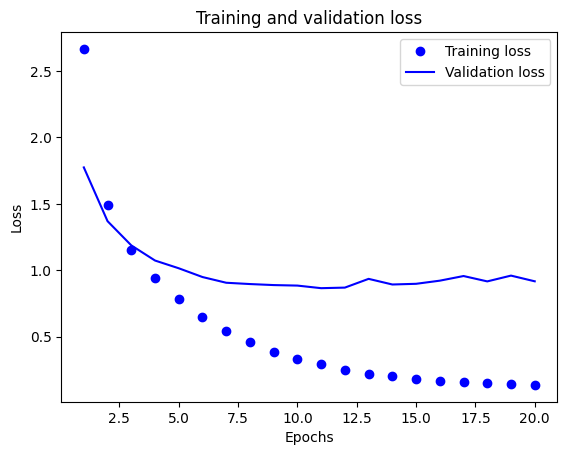

In [17]:
# plot training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

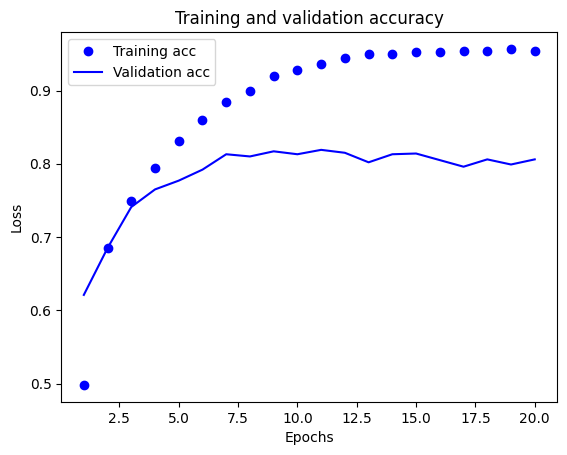

In [22]:
# plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
# retrain model on test data over 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 30ms/step - loss: 2.7044 - accuracy: 0.4337 - val_loss: 1.8156 - val_accuracy: 0.5980
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.5514 - accuracy: 0.6676 - val_loss: 1.3968 - val_accuracy: 0.6790
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.1895 - accuracy: 0.7468 - val_loss: 1.2259 - val_accuracy: 0.7370
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.9616 - accuracy: 0.7939 - val_loss: 1.0881 - val_accuracy: 0.7650
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.7899 - accuracy: 0.8291 - val_loss: 0.9922 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.6509 - accuracy: 0.8599 - val_loss: 0.9716 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5478 - accuracy: 0.8837 - val_loss: 0.9197 - val_accuracy: 0.8040
Epoch 8/9
16/16 [===

In [24]:
print(results)

[0.950171709060669, 0.7845057845115662]


## 3.5.5 Generate Predictions on New Data

In [25]:
# model's .predict() method returns a prob. dist. vector of length 46.
predictions = model.predict(x_test) # each pred. in predictions is of length 46.

# sum of prob. dist. is 1
np.sum(predictions[0])

# the index with the greatest entry is the predicted class
np.argmax(predictions[0])

71/71 [==============================] - 0s 2ms/step


3

## 3.5.6 A different way to handle the labels and the loss

In [26]:
# encoding labels as integer tensors, rather than OHE vectors:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# instead of categorical_crossentropy loss function, use sparse_categorical_crossentropy
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

## Miscellaneous Notes

In [27]:
# using an intermediate layer with too few neurons compresses the data in such a way that some of it is lost. 
# it follows that you should avoid information bottlenecks.
# if you are trying to classify a dataset into N categories, the final layer should be a Dense layer of shape N.
# in single-label, multiclass classification, the final activation function should be softmax (prob. distr. output)
# loss function is generally categorical_crossentropy, unless you encode targets as integers, in which case
# use sparse_categorical_crossentropy